## Example of Filtered Historical Simulation VaR

In [13]:
import pandas as pd
import numpy as np
import re

In [14]:
import quandl
import plotly_express as px

In [15]:
portfolio = quandl.get(["WIKI/AAPL", "WIKI/GE", "WIKI/GOOGL", "WIKI/JNJ"],\
                       start_date="2015-03-12", end_date="2016-03-12",\
                       transformation="rdiff")

In [16]:
portfolio.head()

,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/JNJ - Low,WIKI/JNJ - Close,WIKI/JNJ - Volume,WIKI/JNJ - Ex-Dividend,WIKI/JNJ - Split Ratio,WIKI/JNJ - Adj. Open,WIKI/JNJ - Adj. High,WIKI/JNJ - Adj. Low,WIKI/JNJ - Adj. Close,WIKI/JNJ - Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-13,0.017088,0.003964,0.007811,-0.006910,0.071637,NaN,0.0,0.017088,0.003964,0.007811,...,-0.001930,-0.006211,-0.059654,NaN,0.0,0.008994,-0.001895,-0.001930,-0.006211,-0.059654
2015-03-16,-0.004180,-0.003550,0.002366,0.011004,-0.307811,NaN,0.0,-0.004180,-0.003550,0.002366,...,0.011159,0.018647,-0.012184,NaN,0.0,-0.001102,0.010195,0.011159,0.018647,-0.012184
2015-03-17,0.016306,0.018968,0.022626,0.016727,0.422275,NaN,0.0,0.016306,0.018968,0.022626,...,-0.003309,-0.011577,-0.055001,NaN,0.0,0.003710,-0.005442,-0.003309,-0.011577,-0.055001
2015-03-18,0.008737,0.014452,0.005730,0.011256,0.279243,NaN,0.0,0.008737,0.014452,0.005730,...,-0.002817,0.015717,0.091848,NaN,0.0,-0.002198,0.012137,-0.002817,0.015717,0.091848
2015-03-19,0.013780,0.000659,0.008151,-0.007589,-0.298164,NaN,0.0,0.013780,0.000659,0.008151,...,0.017956,0.002267,-0.139118,NaN,0.0,0.011513,0.002113,0.017956,0.002267,-0.139118


In [17]:
#We only want Adjusted Close
#If someone knows a better way to do this please email me
port_close = portfolio[list(portfolio.columns[portfolio.columns.str.\
                                              contains('Adj. Close')])]
port_close = port_close.rename(columns={"WIKI/AAPL - Adj. Close":"AAPL",\
                                       "WIKI/GE - Adj. Close":"GE",\
                                       "WIKI/GOOGL - Adj. Close":"GOOGL",\
                                       "WIKI/JNJ - Adj. Close":"JNJ"})
port_close


,AAPL,GE,GOOGL,JNJ
Date,,,,
2015-03-13,-0.006910,-0.014173,-0.014559,-0.006211
2015-03-16,0.011004,0.016374,0.015624,0.018647
2015-03-17,0.016727,-0.005501,-0.007175,-0.011577
2015-03-18,0.011256,0.013038,0.015333,0.015717
2015-03-19,-0.007589,-0.012090,-0.004398,0.002267
...,...,...,...,...
2016-03-07,-0.011067,-0.005581,-0.023856,0.002254
2016-03-08,-0.008246,-0.007593,0.001024,-0.004872
2016-03-09,0.000891,-0.000333,0.016650,0.005837


In [18]:
#confirm number of trading days
print(len(port_close))

252


In [19]:
#Convert returns into P/L
weights = [0.2, 0.3, 0.1, 0.4]
returns = (weights * port_close.values).sum(axis=1)
returns #array representing daily P&Ls


array([-9.57415965e-03,  1.61342784e-02, -3.65341038e-03,  1.39830022e-02,
       -4.67805290e-03,  1.34688243e-03,  5.24775620e-03, -4.98262010e-03,
       -1.76796110e-02, -1.32058387e-03, -1.14947852e-03,  1.36670421e-02,
       -1.16613601e-02, -6.63121634e-03,  3.41821318e-03,  4.68740376e-03,
       -5.15650722e-05,  1.99577030e-04,  1.46883257e-02,  3.62434360e-02,
       -1.55531570e-02, -1.51563553e-03, -1.60915611e-03, -5.69109310e-03,
       -5.40597870e-03,  6.78074388e-03, -5.45816342e-03,  7.63357998e-03,
        2.59100881e-03,  5.75687297e-03,  1.24084168e-03, -1.45390549e-04,
       -5.19077338e-03, -1.25262367e-02,  1.28062381e-02,  3.56522479e-04,
       -1.35168914e-02, -5.27517867e-03,  7.08271222e-03,  1.58579717e-02,
       -9.17382851e-03, -3.00343076e-03,  2.68776140e-03,  1.37632100e-02,
       -4.58696194e-04,  7.05774076e-03,  2.82106052e-03,  2.36850526e-03,
        2.03155150e-03, -3.27252936e-03, -9.55394622e-03,  6.26184948e-03,
        8.64226010e-04, -

In [20]:
#Calculate daily volatility over this period
vol = np.std(returns)
print(f"Volatility is {vol}")

Volatility is 0.011148145358035322


In [21]:
#To compute simple historic VaR, we simply sort the P&Ls and pick the one at the 
#percentile we need, in our case 5%
np.sort(returns)

array([-3.46369986e-02, -3.11640941e-02, -2.92703855e-02, -2.84554613e-02,
       -2.82109176e-02, -2.11898623e-02, -1.84900654e-02, -1.77569102e-02,
       -1.77027601e-02, -1.76796110e-02, -1.62738933e-02, -1.62575022e-02,
       -1.61711996e-02, -1.55531570e-02, -1.54979687e-02, -1.52482211e-02,
       -1.51761553e-02, -1.50500676e-02, -1.47611679e-02, -1.45924568e-02,
       -1.40308390e-02, -1.39718748e-02, -1.35168914e-02, -1.31652375e-02,
       -1.30437260e-02, -1.25262367e-02, -1.21587251e-02, -1.21425229e-02,
       -1.17906120e-02, -1.17781430e-02, -1.16613601e-02, -1.15907761e-02,
       -1.10066712e-02, -1.06307039e-02, -1.05979793e-02, -1.04071741e-02,
       -9.99250029e-03, -9.96234355e-03, -9.57415965e-03, -9.55394622e-03,
       -9.17382851e-03, -9.06451069e-03, -9.03904314e-03, -8.91509886e-03,
       -8.51347391e-03, -8.50089957e-03, -8.37957559e-03, -8.34676033e-03,
       -8.19561397e-03, -7.64947614e-03, -7.57168687e-03, -7.46619295e-03,
       -7.43633914e-03, -

In [22]:
historic_var = np.percentile(returns, 5, interpolation="lower")
print(f'The simple historical VaR is {historic_var}')

The simple historical VaR is -0.016171199605525266


In [23]:
port_close['P&L'] = returns #put it back in our dataframe

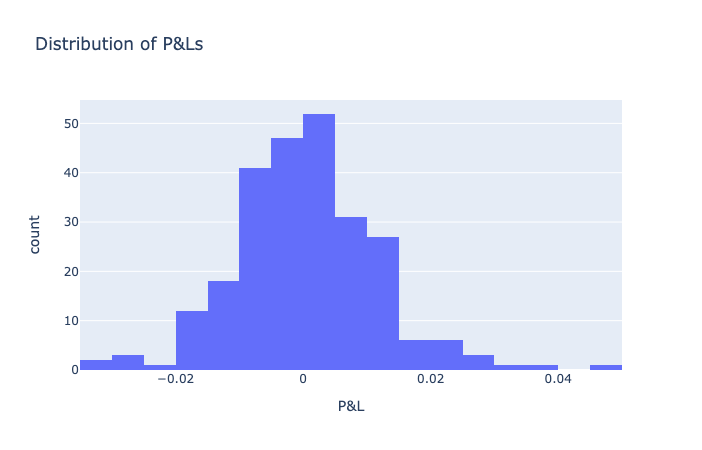

In [27]:
fig = px.histogram(port_close, x='P&L', title="Distribution of P&Ls", nbins=40)
fig.show()

In [30]:
from scipy.stats import kurtosis, skew

In [31]:
print(f"Skew is {skew(returns)}\n")
print(f"Kurtosis is {kurtosis(returns)}")

Skew is 0.30275810677546766

Kurtosis is 1.6703628605029026
